<a href="https://colab.research.google.com/github/Aditya-pixel/Celebal-Technology/blob/main/Predict_Bidding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Loading the dataset

In [ ]:
! wget --header="Host: storage.googleapis.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9" --header="Referer: https://www.kaggle.com/" "https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/7559/44327/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1626405398&Signature=hrbWHpWFJLNV7kEGXjsF4DxKTkl5Ycpy6XRcg37AnheArLKoe3KqCorK38Xxr2XU85rVx7zVqv5DeY%2FBKlws%2B2oxBSRNkbGTRLly2JKuZuhkaZ%2Fhjbh2P3cglArXC4dbCFvP1eQdsN7gnIknWSW4coo%2F%2FEEDG0mye9PR6lkkfT9QeP99llDAOUAU4S2xAMH3KE6XmFHN0HSVDbGteMHZwdh9vx%2FeRGEvSg9P1VLyYSvr0i3qxYnJ0SvVvtDvA%2BE1ealjW49YenIMApVr10SjTe15L92%2B55OwZEqyMu%2Fne9c7rEVynFKnM97DyVsrONi3qZ6C5wWef0BF%2B6TloILWIw%3D%3D&response-content-disposition=attachment%3B+filename%3Dmercari-price-suggestion-challenge.zip" -c -O 'mercari-price-suggestion-challenge.zip'

--2021-07-14 06:22:37--  https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/7559/44327/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1626405398&Signature=hrbWHpWFJLNV7kEGXjsF4DxKTkl5Ycpy6XRcg37AnheArLKoe3KqCorK38Xxr2XU85rVx7zVqv5DeY%2FBKlws%2B2oxBSRNkbGTRLly2JKuZuhkaZ%2Fhjbh2P3cglArXC4dbCFvP1eQdsN7gnIknWSW4coo%2F%2FEEDG0mye9PR6lkkfT9QeP99llDAOUAU4S2xAMH3KE6XmFHN0HSVDbGteMHZwdh9vx%2FeRGEvSg9P1VLyYSvr0i3qxYnJ0SvVvtDvA%2BE1ealjW49YenIMApVr10SjTe15L92%2B55OwZEqyMu%2Fne9c7rEVynFKnM97DyVsrONi3qZ6C5wWef0BF%2B6TloILWIw%3D%3D&response-content-disposition=attachment%3B+filename%3Dmercari-price-suggestion-challenge.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.135.128, 74.125.20.128, 74.125.142.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.135.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 422739618 (403M) [application/zip]
Saving to: ‘mercari-price-su

In [ ]:
! unzip '/content/mercari-price-suggestion-challenge.zip'

Archive:  /content/mercari-price-suggestion-challenge.zip
  inflating: sample_submission.csv.7z  
  inflating: sample_submission_stg2.csv.zip  
  inflating: test.tsv.7z             
  inflating: test_stg2.tsv.zip       
  inflating: train.tsv.7z            


In [ ]:
!apt-get install p7zip
!p7zip -d -f -k /content/test.tsv.7z
!p7zip -d -f -k /content/train.tsv.7z

Reading package lists... Done
Building dependency tree       
Reading state information... Done
p7zip is already the newest version (16.02+dfsg-6).
p7zip set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.

7-Zip (a) [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan /content/                   1 file, 35617013 bytes (34 MiB)

Extracting archive: /content/test.tsv.7z
--
Path = /content/test.tsv.7z
Type = 7z
Physical Size = 35617013
Headers Size = 122
Method = LZMA2:24
Solid = -
Blocks = 1

  0%      8% - test.tsv                16% - test.tsv                24% - test.tsv                32% - test.tsv               

## Reading the Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error as msle

In [ ]:
train_df = pd.read_table('./train.tsv')
test_df = pd.read_table('./test.tsv')

In [ ]:
train_df

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity
...,...,...,...,...,...,...,...,...
1482530,1482530,Free People Inspired Dress,2,Women/Dresses/Mid-Calf,Free People,20.0,1,"Lace, says size small but fits medium perfectl..."
1482531,1482531,Little mermaid handmade dress,2,Kids/Girls 2T-5T/Dresses,Disney,14.0,0,Little mermaid handmade dress never worn size 2t
1482532,1482532,21 day fix containers and eating plan,2,Sports & Outdoors/Exercise/Fitness accessories,NaN,12.0,0,"Used once or twice, still in great shape."
1482533,1482533,World markets lanterns,3,Home/Home Décor/Home Décor Accents,NaN,45.0,1,There is 2 of each one that you see! So 2 red ...


In [ ]:
train_df.head(10)

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity
5,5,Bundled items requested for Ruie,3,Women/Other/Other,NaN,59.0,0,"Banana republic bottoms, Candies skirt with ma..."
6,6,Acacia pacific tides santorini top,3,Women/Swimwear/Two-Piece,Acacia Swimwear,64.0,0,Size small but straps slightly shortened to fi...
7,7,Girls cheer and tumbling bundle of 7,3,Sports & Outdoors/Apparel/Girls,Soffe,6.0,1,You get three pairs of Sophie cheer shorts siz...
8,8,Girls Nike Pro shorts,3,Sports & Outdoors/Apparel/Girls,Nike,19.0,0,Girls Size small Plus green. Three shorts total.
9,9,Porcelain clown doll checker pants VTG,3,Vintage & Collectibles/Collectibles/Doll,NaN,8.0,0,I realized his pants are on backwards after th...


## About the dataset(EDA And Feature Engineering)
The files consist of a list of product listings. These files are tab-delimited.

train_id or test_id : the id of the listing

name : the title of the listing. Note that we have cleaned the data to remove text that look like price to avoid leakage. These removed prices are represented as rm

item_condition_id : the condition of the items provided by the seller

category_name : category of the listing
brand_name

price : the price that the item was sold for. This is the target variable that you will predict. The unit is USD. This column doesn't exist in test.tsv since that is what you will predict.
shipping - 1 if shipping fee is paid by seller and 0 by buyer

item_description : the full description of the item. Note that we have cleaned the data to remove text that look like prices (e.g. $20) to avoid leakage. These removed prices are represented as [rm]

In [ ]:
train_df.shape

(1482535, 8)

In [ ]:
test_df.shape

(693359, 7)

In [ ]:
train_df['price']

0          10.0
1          52.0
2          10.0
3          35.0
4          44.0
           ... 
1482530    20.0
1482531    14.0
1482532    12.0
1482533    45.0
1482534    22.0
Name: price, Length: 1482535, dtype: float64

In [ ]:
import seaborn as sns

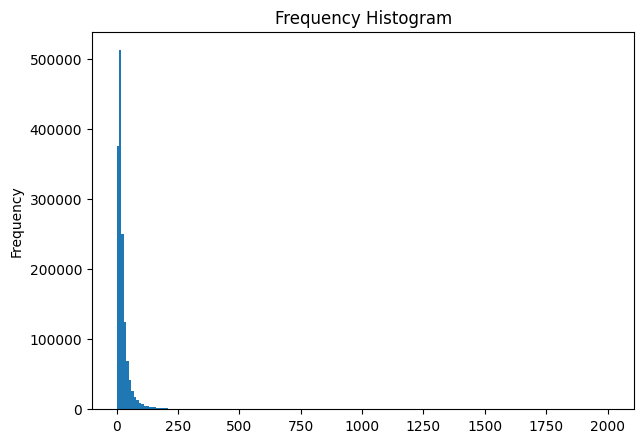

In [ ]:
%matplotlib inline
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})

# Plot Histogram on x

plt.hist(train_df['price'], bins=200)
plt.gca().set(title='Frequency Histogram', ylabel='Frequency');

The histogram suggests that the price is right skewed, hence transformation such as log is required to evenly spread the data

In [11]:
train_df['log_price'] = np.log(train_df['price']+1)

In [ ]:
train_df

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,log_price
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet,2.397895
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...,3.970292
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...,2.397895
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...,3.583519
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity,3.806662
...,...,...,...,...,...,...,...,...,...
1482530,1482530,Free People Inspired Dress,2,Women/Dresses/Mid-Calf,Free People,20.0,1,"Lace, says size small but fits medium perfectl...",3.044522
1482531,1482531,Little mermaid handmade dress,2,Kids/Girls 2T-5T/Dresses,Disney,14.0,0,Little mermaid handmade dress never worn size 2t,2.708050
1482532,1482532,21 day fix containers and eating plan,2,Sports & Outdoors/Exercise/Fitness accessories,NaN,12.0,0,"Used once or twice, still in great shape.",2.564949
1482533,1482533,World markets lanterns,3,Home/Home Décor/Home Décor Accents,NaN,45.0,1,There is 2 of each one that you see! So 2 red ...,3.828641


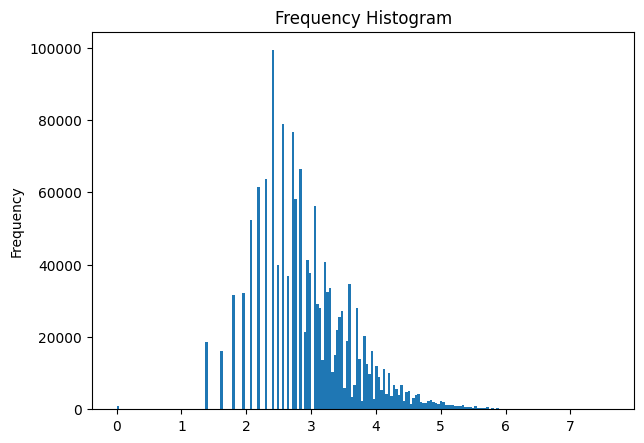

In [ ]:
plt.hist(train_df['log_price'], bins=200)
plt.gca().set(title='Frequency Histogram', ylabel='Frequency');

### Categorizing Item Description

In [13]:
tv = TfidfVectorizer(min_df = 0.0001,max_df = 0.995, stop_words='english')
X_description = tv.fit_transform(train_df['item_description'].values.astype(str))

In [ ]:
X_description.shape

(1482535, 8662)

In [ ]:
import matplotlib.pyplot as plt
from numpy import concatenate
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE
n_clusters = 30
random_state = 1
clf = KMeans(n_clusters=n_clusters, random_state=random_state)
X_des = X_description[:100,:]
data = clf.fit(X_des)
centroids = clf.cluster_centers_
# we want to transform the rows and the centroids
everything = concatenate((X_des.todense(), centroids))

tsne_init = 'pca'  # could also be 'random'
tsne_perplexity = 20.0
tsne_early_exaggeration = 4.0
tsne_learning_rate = 10
model = TSNE(n_components=2, random_state=random_state, init=tsne_init,
    perplexity=tsne_perplexity,
    early_exaggeration=tsne_early_exaggeration, learning_rate=tsne_learning_rate)

transformed_everything = model.fit_transform(everything)
print(transformed_everything)
plt.scatter(transformed_everything[:-n_clusters, 0], transformed_everything[:-n_clusters, 1], marker='x')
plt.scatter(transformed_everything[-n_clusters:, 0], transformed_everything[-n_clusters:, 1], marker='o')

plt.show()

###  Categorizing Categories Name

In [15]:
def split_cat(text):
    try: return text.split("/")
    except: return ("No Label", "No Label" ,"No Label")

In [16]:
train_df['general_cat'].unique()

KeyError: ignored

In [17]:
train_df['general_cat'], train_df['subcat_1'], train_df['subcat_2'] = \
zip(*train_df['category_name'].apply(lambda x: split_cat(x)))
train_df.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,log_price,general_cat,subcat_1,subcat_2
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet,2.397895,Men,Tops,T-shirts
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...,3.970292,Electronics,Computers & Tablets,Components & Parts
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...,2.397895,Women,Tops & Blouses,Blouse
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...,3.583519,Home,Home Décor,Home Décor Accents
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity,3.806662,Women,Jewelry,Necklaces


In [ ]:
train_df['subcat_1'].unique()

array(['Tops', 'Computers & Tablets', 'Tops & Blouses', 'Home Décor',
       'Jewelry', 'Other', 'Swimwear', 'Apparel', 'Collectibles',
       'Makeup', 'Fragrance', 'Dresses', 'Office supplies', 'Shoes',
       'Gear', 'Athletic Apparel', 'Cell Phones & Accessories', 'Jeans',
       'Underwear', 'Skin Care', 'Toys', "Women's Handbags",
       'Video Games & Consoles', 'Coats & Jackets', 'Pants', 'Girls (4+)',
       'Antique', 'Kitchen & Dining', 'Sweaters', 'Boys 0-24 Mos',
       'Girls 0-24 Mos', 'Maternity', 'Bedding', 'Exercise',
       'Trading Cards', 'Boys (4+)', 'Storage & Organization', 'Fan Shop',
       'Girls 2T-5T', "Men's Accessories", 'Boys 2T-5T',
       "Women's Accessories", 'Daily & Travel items', 'No Label',
       'Skirts', 'Hair Care', 'Pet Supplies', 'Book',
       'Tools & Accessories', 'Team Sports', 'Home Appliances',
       'Accessories', 'Bags and Purses', 'Sweats & Hoodies', 'Shorts',
       'TV, Audio & Surveillance', 'Outdoors', 'Bath & Body',
       'C

In [ ]:
train_df['subcat_2'].nunique()

871

In [ ]:
train_df['general_cat'].nunique()

11

We will count vectorize subcat_1 and subcat_2 since there are many unique datapoints, and dummy variable the main category since only 11 are there. This will help in better generalization.

After this we will make dummy variable for Main category and sparse merge all of them.

Text(0, 0.5, 'Price')

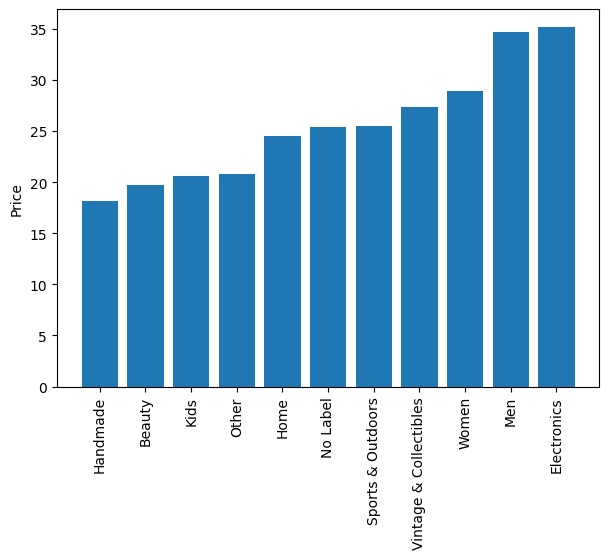

In [ ]:
import seaborn as sns

Gen = train_df.groupby('general_cat')['price'].mean().reset_index().sort_values('price')
plt.bar(Gen['general_cat'], Gen['price'])
plt.xticks(rotation = 90)
plt.ylabel('Price')

In [18]:
vectorizer = CountVectorizer(min_df = 0.05, stop_words = ['&'], max_df = 0.95)
X = vectorizer.fit_transform(train_df['subcat_1']) 


In [19]:
from scipy.sparse import csr_matrix, hstack
Gen_dummy = csr_matrix(pd.get_dummies(train_df['general_cat'], sparse=True).values)

In [20]:
vectorizer2 = CountVectorizer(min_df = 0.03,stop_words = ['&'], max_df = 0.95)
Y = vectorizer2.fit_transform(train_df['subcat_2']) 

Here X,Y are subcat_1 and subcat_2 respectively.

H

### Item Condition ID and Shipping

In [ ]:
item_cond = train_df['item_condition_id']
ship = train_df['shipping']

In [ ]:
itemcon = train_df.groupby('item_condition_id')['price'].mean().reset_index()

<BarContainer object of 5 artists>

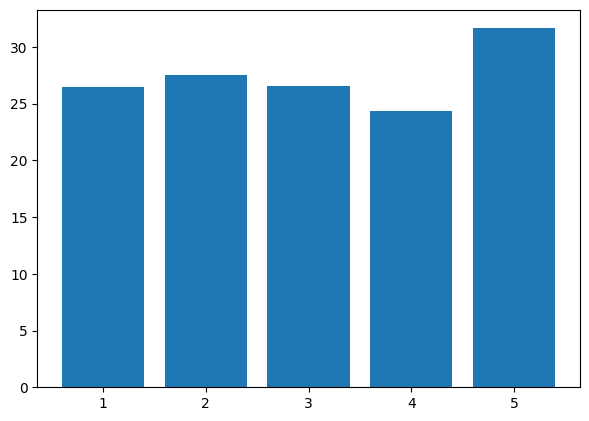

In [ ]:
plt.bar(itemcon['item_condition_id'],itemcon['price'])

Since item_condition does not vary price significantly amoung the region,it is better to make dummy variables off it.

In [ ]:
from scipy.sparse import csr_matrix, hstack
item_dummy = csr_matrix(pd.get_dummies(train_df['item_condition_id'], sparse=True).values)

,shipping,price
0,0,30.111778
1,1,22.567726


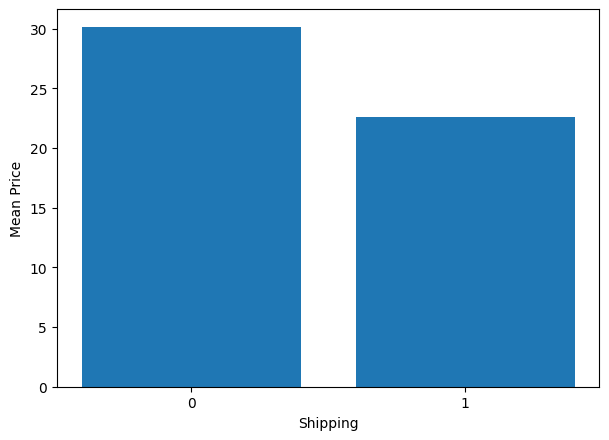

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from imp import reload
reload(plt)
Ship = train_df.groupby('shipping')['price'].mean().reset_index()
plt.ylabel('Mean Price')
plt.xlabel('Shipping')
plt.bar(Ship['shipping'], Ship['price'])
plt.xticks([0,1])
Ship

In [ ]:
X_ship = item_dummy = csr_matrix(pd.get_dummies(train_df['shipping'], sparse=True).values)
X_ship.shape

(1482535, 2)

### Product Name

In [ ]:
 from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
vectorizer = CountVectorizer(min_df = 0.005, max_df = 0.85)
X_name = vectorizer.fit_transform(train_df['name']) 

In [ ]:
X_name

<1482535x123 sparse matrix of type '<class 'numpy.int64'>'
	with 2355961 stored elements in Compressed Sparse Row format>

In [ ]:
train_df['brand_name'].nunique()

4809

In [ ]:
item_dummy

<1482535x5 sparse matrix of type '<class 'numpy.uint8'>'
	with 1482535 stored elements in Compressed Sparse Row format>

### BRAND NAME

In [ ]:
train_df['brand_name'].nunique()

4809

In [ ]:
NUM_BRANDS = 4800

In [ ]:
def handle_missing_inplace(dataset): 
    
    dataset['brand_name'].fillna(value='missing', inplace=True) 
    
def cutting(dataset):
    pop_brand = dataset['brand_name'].value_counts().loc[lambda x: x.index != 'missing'].index[:NUM_BRANDS]
    dataset.loc[~dataset['brand_name'].isin(pop_brand), 'brand_name'] = 'missing'
def to_categorical(dataset):
    
    dataset['brand_name'] = dataset['brand_name'].astype('category')

In [ ]:
handle_missing_inplace(train_df)
cutting(train_df)
to_categorical(train_df)

In [ ]:
lb = LabelBinarizer(sparse_output=True)
X_brand = lb.fit_transform(train_df['brand_name'])

In [ ]:
X_brand.shape

(1482535, 4801)

In [ ]:
train_merge = hstack((Gen_dummy, X_description, X, Y,X_name, X_ship)).tocsr()

## Saving the Feature Engineered CSR matrix

In [2]:
from scipy import sparse

#sparse.save_npz("train_merge.npz", train_merge)


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#%cp -av "/content/train_merge.npz" "/content/drive/MyDrive/Colab Notebooks/train_merge.npz"  

cp: cannot stat '/content/train_merge.npz': No such file or directory


In [4]:
%cp -av "/content/drive/MyDrive/Colab Notebooks/train_merge.npz"   "/content/train_merge.npz" 

'/content/drive/MyDrive/Colab Notebooks/train_merge.npz' -> '/content/train_merge.npz'


In [5]:
%cp -av  "/content/drive/MyDrive/Colab Notebooks/train.tsv" "/content/train.tsv"

'/content/drive/MyDrive/Colab Notebooks/train.tsv' -> '/content/train.tsv'


In [6]:
train_merge = sparse.load_npz("train_merge.npz")

In [7]:
train_df = pd.read_table('./train.tsv')

## MODEL SELECTION

In [8]:
train_df['log_price'] = np.log(train_df['price'] + 1)

In [9]:
from sklearn.model_selection import train_test_split
y = train_df['log_price']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(train_merge,y, test_size=0.3, train_size=0.7, random_state=41, shuffle=True)

In [ ]:
del train_df,train_merge

In [ ]:
import math

In [ ]:
def rmsle(y, y_pred):
    return np.sqrt(np.mean(np.power(np.log1p(y) - np.log1p(y_pred), 2)))

In [ ]:
def accuracy(y_test, y_pred):
  y_pred = np.exp(y_pred)
  y_test = np.exp(y_test)
  error = rmsle(y_test, y_pred)
  print(error)

### Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression().fit(X_train,y_train)
y_pred = regr.predict(X_test)
y_train_pred = regr.predict(X_train)
accuracy(y_train,y_train_pred)
accuracy(y_test,y_pred)

0.5307205642607202
0.5368696899301144


### Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso
lassoReg = Lasso(alpha=0.0005, normalize=False)
lassoReg.fit(X_train,y_train)
y_pred = lassoReg.predict(X_test)
accuracy(y_test,y_pred)

0.6090482246915927


### SGDRegressor

In [ ]:
from sklearn.linear_model import SGDRegressor
regr = SGDRegressor(max_iter = 10000, 
                    learning_rate = 'adaptive', 
                    n_iter_no_change = 30, 
                    alpha = 0.000005
                    )
regr.fit(X_train,y_train)
y_pred = regr.predict(X_test)
accuracy(y_test,y_pred) 

0.5368231751732048


### LinearSVR

In [ ]:
from sklearn.svm import LinearSVR
regr = LinearSVR(random_state = 42,
                 tol = 0.0001,
                 fit_intercept = False,
                 max_iter = 100000)
regr.fit(X_train,y_train)
y_pred = regr.predict(X_test)
accuracy(y_test,y_pred)

0.5427796360171678


### MLP Regressor

In [ ]:
from sklearn.neural_network import MLPRegressor
regr = MLPRegressor(hidden_layer_sizes = 500,
                    solver = 'adam',
                    batch_size = 10000,
                    learning_rate = 'invscaling',
                    max_iter = 5000,
                    early_stopping = True,
                    validation_fraction = 0.3,
                    tol = 0.01)
regr.fit(X_train,y_train)
y_pred = regr.predict(X_test)
accuracy(y_test,y_pred)

### LightGBM Regressor

In [ ]:
from lightgbm import LGBMRegressor

In [ ]:
def test_params(**params):
    model = LGBMRegressor(random_state=42, n_jobs=-1, **params).fit(X_train, y_train)
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    return accuracy(y_train,train_pred) ,accuracy(y_test, test_pred)

In [ ]:
def test_param_and_plot(param_name, param_values):
    train_errors, val_errors = [], [] 
    for value in param_values:
        params = {param_name: value}
        train_rmse, val_rmse = test_params(**params)
        train_errors.append(train_rmse)
        val_errors.append(val_rmse)
    plt.figure(figsize=(10,6))
    plt.title('Overfitting curve: ' + param_name)
    plt.plot(param_values, train_errors, 'b-o')
    plt.plot(param_values, val_errors, 'r-o')
    plt.xlabel(param_name)
    plt.ylabel('Error')
    plt.legend(['Training', 'Validation'])

boosting type

In [ ]:
test_params(boosting_type = 'goss')

0.533090552145889
0.5375020235811065


(None, None)

In [ ]:
test_params(boosting_type = 'gbdt')

0.5519007749412812
0.5549565831305731


(None, None)

max_depth

In [ ]:
test_param_and_plot('max_depth', [5,10,15,20])

In [ ]:
test_params(max_depth = 30)

0.5519007749412812
0.5549565831305731


(None, None)

In [ ]:
params['max_depth'] = 30

learning rate

In [ ]:
test_params(learning_rate = 0.35)

0.5257807385330497
0.5318406029265634


(None, None)

In [ ]:
test_params(learning_rate = 0.4)

0.5232799600431658
0.5298846517230518


(None, None)

In [ ]:
test_params(learning_rate = 0.45)

0.5217074381363371
0.5291311534496912


(None, None)

In [ ]:
test_param_and_plot('learning_rate', [0.3,0.45,0.65,0.8])

In [ ]:
params['learning_rate'] = 0.45

importance_type

In [ ]:
test_params(importance_type = 'split')

0.5519007749412812
0.5549565831305731


(None, None)

In [ ]:
test_params(importance_type = 'gain')

0.5519007749412812
0.5549565831305731


(None, None)

min_child_samples 

In [ ]:
test_params(min_child_samples = 40)

0.5521673699645284
0.5552115551731455


(None, None)

In [ ]:
test_params(min_child_samples = 12)

0.5519007749412812
0.5549565831305731


(None, None)

In [ ]:
test_params(min_child_samples = 30)

0.5519007749412812
0.5549565831305731


(None, None)

In [ ]:
test_param_and_plot('min_child_samples', [12,20,31,40])

n_estimators

In [ ]:
test_params(n_estimators = 500)

0.5151270948917595
0.5228667972369414


(None, None)

In [ ]:
test_params(n_estimators = 1000)

0.4995335182893711
0.5122472107681321


(None, None)

In [ ]:
test_params(n_estimators = 300)

0.526385290188485
0.5319037376828194


(None, None)

In [ ]:
params['n_estimators'] = 500

num_leaves

In [ ]:
test_params(num_leaves = 100)

0.5250844503100159
0.5314273299819376


(None, None)

In [ ]:
test_params(num_leaves = 500)

0.48010189989447244
0.5047678772318765


(None, None)

In [ ]:
params['num_leaves'] = 750

In [ ]:
params = {
    'boosting_type' : 'gbdt'
}
params['learning_rate'] = 0.25
params['n_estimators'] = 200
params['num_leaves'] = 750
params['reg_alpha'] = 0.001
regr = LGBMRegressor(**params, random_state = 42)
y_pred = regr.predict(X_test)
accuracy(y_test,y_pred)

## Saving the Model

In [ ]:
import joblib
joblib.dump(regr, 'LightGBM.joblib')

## Demonstration of Code

In [21]:
train_merge

<1482535x8813 sparse matrix of type '<class 'numpy.float64'>'
	with 26922976 stored elements in Compressed Sparse Row format>

In [45]:
example1 = train_merge[12345]
example2 = train_merge[10000]
example3 = train_merge[400000]
example4 = train_merge[414140]

In [46]:
example1

<1x8813 sparse matrix of type '<class 'numpy.float64'>'
	with 31 stored elements in Compressed Sparse Row format>

In [47]:
model = joblib.load('./LightGBM.joblib')

In [49]:
result1 = [[model.predict(example1),model.predict(example2),model.predict(example3),model.predict(example4)]]

In [50]:
result1

[[array([3.07733857]),
  array([3.03261012]),
  array([3.17309709]),
  array([2.17270095])]]

In [53]:
import numpy as np

In [52]:
[y[12345],
 y[10000],
 y[400000],
 y[414140]]

[2.70805020110221, 4.382026634673881, 3.044522437723423, 2.1972245773362196]